# Mutational variance

We've dome some simulations with $N=10^4$ where we vary the mutation rate and variance in effect size such that the mutational variance is kept constant.

The script params are in hpc/sub_single_region_explore.sh

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#mu=1e-3,sigmu=0.25,VS=1
himu=pd.read_hdf('../himu.h5')

In [3]:
#mu=1e-4,sigmu=0.7905694,VS=10
lomu=pd.read_hdf('../lomu.h5')

In [4]:
#mu=1e-4,sugmu=2.5,VS=100
vlomu=pd.read_hdf('../vlomu.h5')

In [5]:
himu.head()

,generation,stat,value,rep
0,100,VG,0.002905,0
1,100,VE,0.000000,0
2,100,leading_q,0.004250,0
3,100,leading_e,0.291590,0
4,100,max_expl,0.000720,0


In [6]:
himug=himu.groupby(['generation','stat']).mean()
lomug=lomu.groupby(['generation','stat']).mean()
vlomug=vlomu.groupby(['generation','stat']).mean()
himug.reset_index(inplace=True)
lomug.reset_index(inplace=True)
vlomug.reset_index(inplace=True)

# Temporal dynamics

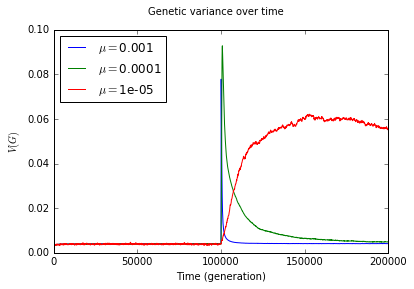

In [18]:
fig=plt.figure()
mu=[1e-3,1e-4,1e-5]

for i,j in zip([himug,lomug,vlomug],mu):
    plt.plot(i.generation[i.stat=='VG'],i.value[i.stat=='VG'],label=r'$\mu = $'+'{0:0.2}'.format(j))
plt.legend(loc='upper left')
plt.suptitle("Genetic variance over time")
plt.xlabel("Time (generation)")
plt.ylabel(r'$V(G)$')
plt.show()

In [19]:
himug.stat.unique()

array(['VE', 'VG', 'Vst', 'ebar', 'f0', 'leading_e', 'leading_q',
       'max_expl', 'mload', 'tbar', 'varw', 'wbar'], dtype=object)

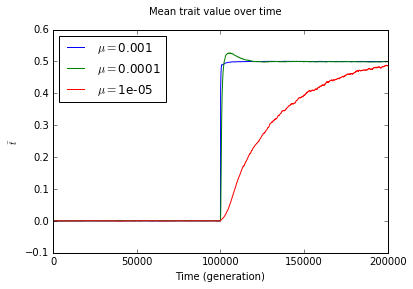

In [20]:
fig=plt.figure()
for i,j in zip([himug,lomug,vlomug],mu):
    plt.plot(i.generation[i.stat=='tbar'],i.value[i.stat=='tbar'],label=r'$\mu = $'+'{0:0.2}'.format(j))
plt.legend(loc='upper left')
plt.suptitle("Mean trait value over time")
plt.xlabel("Time (generation)")
plt.ylabel(r'$\bar{t}$')
plt.show()

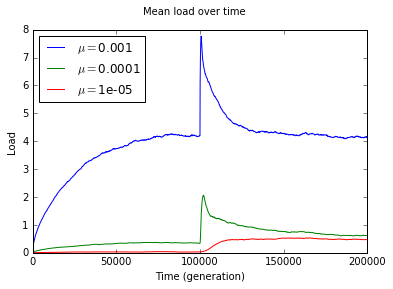

In [21]:
fig=plt.figure()
for i,j in zip([himug,lomug,vlomug],mu):
    plt.plot(i.generation[i.stat=='mload'],i.value[i.stat=='mload'],label=r'$\mu = $'+'{0:0.2}'.format(j))
plt.legend(loc='upper left')
plt.suptitle("Mean load over time")
plt.xlabel("Time (generation)")
plt.ylabel(r'Load')
plt.show()

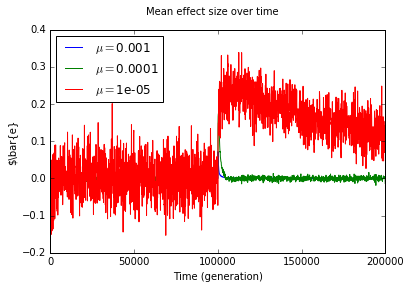

In [22]:
fig=plt.figure()
for i,j in zip([himug,lomug,vlomug],mu):
    plt.plot(i.generation[i.stat=='ebar'],i.value[i.stat=='ebar'],label=r'$\mu = $'+'{0:0.2}'.format(j))
plt.legend(loc='upper left')
plt.suptitle("Mean effect size over time")
plt.xlabel("Time (generation)")
plt.ylabel(r'$\bar{e}')
plt.show()

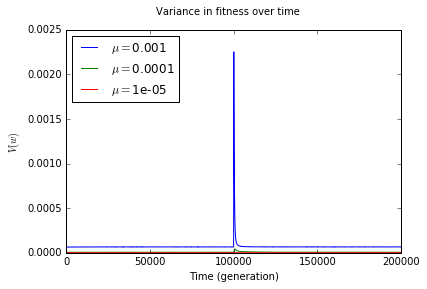

In [24]:
fig=plt.figure()
for i,j in zip([himug,lomug,vlomug],mu):
    plt.plot(i.generation[i.stat=='varw'],i.value[i.stat=='varw'],label=r'$\mu = $'+'{0:0.2}'.format(j))
plt.legend(loc='upper left')
plt.suptitle("Variance in fitness over time")
plt.xlabel("Time (generation)")
plt.ylabel(r'$V(w)$')
plt.show()

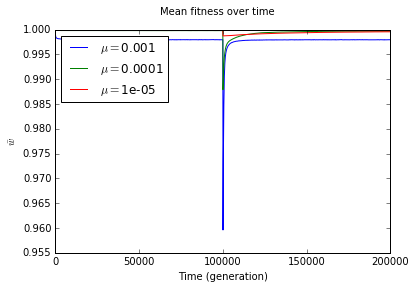

In [25]:
fig=plt.figure()
for i,j in zip([himug,lomug,vlomug],mu):
    plt.plot(i.generation[i.stat=='wbar'],i.value[i.stat=='wbar'],label=r'$\mu = $'+'{0:0.2}'.format(j))
plt.legend(loc='upper left')
plt.suptitle("Mean fitness over time")
plt.xlabel("Time (generation)")
plt.ylabel(r'$\bar{w}$')
plt.show()